# Project - Real Estate Price Prediction 

####  Aim of project - To predict the per sq.ft. for the properties available in Pune

### Import Libraries

In [203]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
# Using GridSearchCV to find the best algorithm for this problem
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

### Load Dataset

In [204]:
# Importing the dataset

pun = pd.read_csv(r"O:\IMARTICUS LECTURES\Python\Pandas Data Set\Pune_real_estate_data.csv")
pun

,site_location,availability,BHK,society,bath,balcony,total_sqft,area_type,price
0,Navi Peth,18-Dec,2.0,Omter A,2.0,0.0,1000 - 1285,Super built-up Area,43.415
1,Padmavati,Ready To Move,5.0,NaN,5.0,2.0,4239,Super built-up Area,423.000
2,Parvati Darshan,Ready To Move,2.0,NaN,1.0,0.0,884,Built-up Area,58.000
3,Pashan,19-Mar,2.0,Skume R,2.0,1.0,1045,Super built-up Area,98.890
4,Paud Road,Ready To Move,2.0,NaN,2.0,2.0,1019,Super built-up Area,49.860
...,...,...,...,...,...,...,...,...,...
13153,Pashan,Ready To Move,5.0,ArsiaEx,4.0,0.0,3453,Built-up Area,231.000
13154,Paud Road,Ready To Move,4.0,NaN,5.0,NaN,3600,Super built-up Area,400.000
13155,Pirangut,Ready To Move,2.0,Mahla T,2.0,1.0,1141,Built-up Area,60.000
13156,Prabhat Road,18-Jun,4.0,SollyCl,4.0,1.0,4689,Super built-up Area,488.000


### Statical Analysis on Dataset

In [205]:
pun.price.describe(percentiles=[.1,.2,.3,.4,.5,.6,.7,.8,.9,1])                      

count    13158.000000
mean       110.909116
std        144.532245
min          8.000000
10%         38.000000
20%         45.794000
30%         53.760000
40%         61.000000
50%         70.387500
60%         85.000000
70%        101.000000
80%        135.000000
90%        220.000000
100%      2912.000000
max       2912.000000
Name: price, dtype: float64

In [206]:
pun.corr()

C:\Users\andu_13\AppData\Local\Temp\ipykernel_10544\4086681631.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pun.corr()


,BHK,bath,balcony,price
BHK,1.000000,0.850438,0.228387,0.437603
bath,0.850438,1.000000,0.242809,0.494326
balcony,0.228387,0.242809,1.000000,0.121561
price,0.437603,0.494326,0.121561,1.000000


### EXPLORATORY DATA ANALYSIS

In [145]:
pun.shape

# dateset has 13158 columns and 9 rows

(13158, 9)

In [146]:
pun.groupby('area_type')['area_type'].agg('count')

# From the area_type column Built-up  Area is occured maximum time

area_type
Built-up  Area          2394
Carpet  Area              85
Plot  Area              1905
Super built-up  Area    8774
Name: area_type, dtype: int64

In [147]:
pun.availability.value_counts()

# Here we can understand there are 10426 Ready to move homes out off 13158 

Ready To Move    10426
18-Dec             307
18-May             294
18-Apr             269
18-Aug             200
                 ...  
16-Oct               1
15-Dec               1
15-Jun               1
16-Jul               1
14-Jul               1
Name: availability, Length: 81, dtype: int64

In [148]:
pun.BHK.value_counts()

# 2 BHK are the highest follwed by 3 BHK 

2.0    5529
3.0    4857
4.0    1417
1.0     656
5.0     356
6.0     221
7.0     100
0.5       4
Name: BHK, dtype: int64

In [149]:
pun.groupby('site_location')['site_location'].agg('count')

# Exploring the location

site_location
Alandi Road        138
Ambegaon Budruk    138
Anandnagar         138
Aundh              138
Aundh Road         137
                  ... 
Wakadewadi         137
Wanowrie           136
Warje              138
Yerawada           137
other                1
Name: site_location, Length: 97, dtype: int64

In [150]:
# droping the ID column
# As the Scoiety name is leat related to the target variable

pun = pun.drop(['society'], axis = 1)

## Graphical Analysis

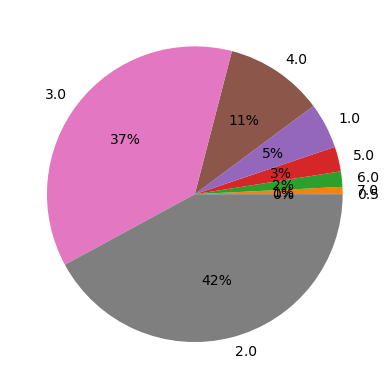

In [151]:
BHK = pd.DataFrame(pun.BHK.value_counts())
BHK.columns = ['Counts']
BHK = BHK.sort_values('Counts', ascending=True)
plt.pie(x = BHK.Counts, labels = BHK.index, autopct = '%1.0f%%');

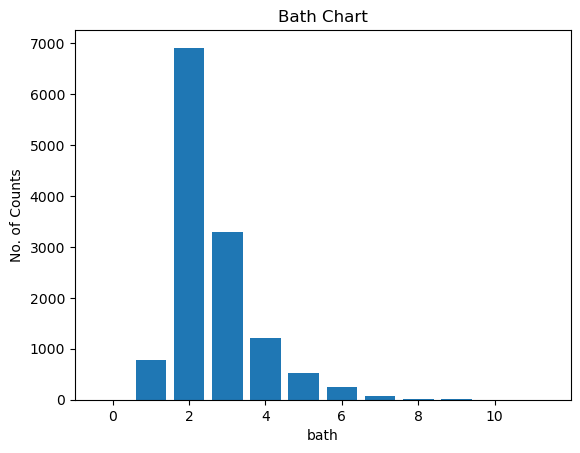

In [152]:
bath = pd.DataFrame(pun.bath.value_counts())
bath.columns = ['Counts']
bath = bath.sort_values('Counts', ascending=True)
plt.bar(bath.index, bath['Counts'])
plt.xlabel('bath')
plt.ylabel('No. of Counts')
plt.title('Bath Chart');

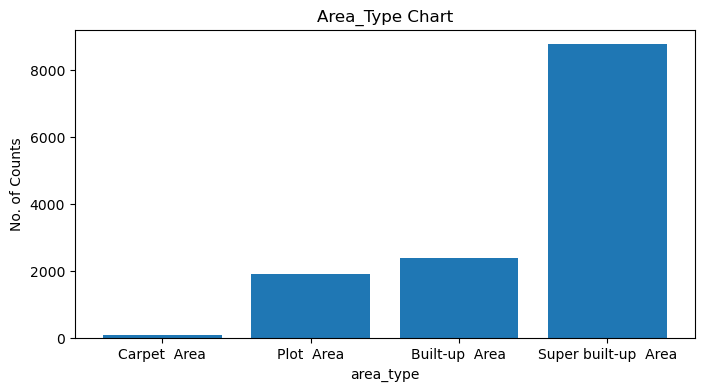

In [153]:
area_type = pd.DataFrame(pun.area_type.value_counts())
area_type.columns = ['Counts']
area_type = area_type.sort_values('Counts', ascending=True)
plt.figure(figsize=(8, 4))
plt.bar(area_type.index, area_type['Counts'])
plt.xlabel('area_type')
plt.ylabel('No. of Counts')
plt.title('Area_Type Chart');

## Data Cleaning

In [154]:
pun.isnull().sum()

site_location      1
availability       0
BHK               18
bath              75
balcony          557
total_sqft         0
area_type          0
price              0
dtype: int64

In [155]:
pun.bath.value_counts()

2.0     6908
3.0     3285
4.0     1220
1.0      788
5.0      519
6.0      251
7.0       82
8.0       18
9.0       10
0.0        1
11.0       1
Name: bath, dtype: int64

In [156]:
# filling the null values

In [157]:
pun.balcony = pun.balcony.fillna(0)
pun.bath = pun.bath.fillna(2)
pun['BHK'] = pun['BHK'].fillna(2)

In [158]:
pun = pun.dropna()
# Dropping the rows with null values because the dataset is huge as compared to null values.


In [159]:
pun

,site_location,availability,BHK,bath,balcony,total_sqft,area_type,price
0,Navi Peth,18-Dec,2.0,2.0,0.0,1000 - 1285,Super built-up Area,43.415
1,Padmavati,Ready To Move,5.0,5.0,2.0,4239,Super built-up Area,423.000
2,Parvati Darshan,Ready To Move,2.0,1.0,0.0,884,Built-up Area,58.000
3,Pashan,19-Mar,2.0,2.0,1.0,1045,Super built-up Area,98.890
4,Paud Road,Ready To Move,2.0,2.0,2.0,1019,Super built-up Area,49.860
...,...,...,...,...,...,...,...,...
13153,Pashan,Ready To Move,5.0,4.0,0.0,3453,Built-up Area,231.000
13154,Paud Road,Ready To Move,4.0,5.0,0.0,3600,Super built-up Area,400.000
13155,Pirangut,Ready To Move,2.0,2.0,1.0,1141,Built-up Area,60.000
13156,Prabhat Road,18-Jun,4.0,4.0,1.0,4689,Super built-up Area,488.000


In [160]:
pun.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13157 entries, 0 to 13157
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   site_location  13157 non-null  object 
 1   availability   13157 non-null  object 
 2   BHK            13157 non-null  float64
 3   bath           13157 non-null  float64
 4   balcony        13157 non-null  float64
 5   total_sqft     13157 non-null  object 
 6   area_type      13157 non-null  object 
 7   price          13157 non-null  float64
dtypes: float64(4), object(4)
memory usage: 925.1+ KB


In [161]:
# Exploring the total_sqft column
pun.total_sqft.unique()

array(['1000 - 1285', '4239', '884', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [162]:
# Converting the range values to integer values and removing other types of error

def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
    


In [163]:
pun['new_total_sqft'] = pun.total_sqft.apply(convert_sqft_to_num)
pun= pun.drop('total_sqft', axis='columns')
pun.head()

,site_location,availability,BHK,bath,balcony,area_type,price,new_total_sqft
0,Navi Peth,18-Dec,2.0,2.0,0.0,Super built-up Area,43.415,1142.5
1,Padmavati,Ready To Move,5.0,5.0,2.0,Super built-up Area,423.000,4239.0
2,Parvati Darshan,Ready To Move,2.0,1.0,0.0,Built-up Area,58.000,884.0
3,Pashan,19-Mar,2.0,2.0,1.0,Super built-up Area,98.890,1045.0
4,Paud Road,Ready To Move,2.0,2.0,2.0,Super built-up Area,49.860,1019.0


In [164]:
# Adding the price column as prices at last

pun['prices'] = pun['price']
pun=pun.drop("price",axis=1)

In [165]:
# Removing the rows in new_total_sqft column that hase None values
pun.isnull().sum()

site_location      0
availability       0
BHK                0
bath               0
balcony            0
area_type          0
new_total_sqft    43
prices             0
dtype: int64

In [166]:
# Removing the rows in new_total_sqft column that has None values
pun = pun.dropna()
pun.isnull().sum()

site_location     0
availability      0
BHK               0
bath              0
balcony           0
area_type         0
new_total_sqft    0
prices            0
dtype: int64

In [167]:
pun.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13114 entries, 0 to 13157
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   site_location   13114 non-null  object 
 1   availability    13114 non-null  object 
 2   BHK             13114 non-null  float64
 3   bath            13114 non-null  float64
 4   balcony         13114 non-null  float64
 5   area_type       13114 non-null  object 
 6   new_total_sqft  13114 non-null  float64
 7   prices          13114 non-null  float64
dtypes: float64(5), object(3)
memory usage: 922.1+ KB


In [168]:
# Removing the extra spaces at the end
pun.site_location = pun.site_location.apply(lambda x: x.strip())

# Calulating all the unqiue values in 'site_location' column
location_stats = pun.groupby('site_location')['site_location'].agg('count').sort_values(ascending=False)
location_stats

site_location
Khadki             139
Nana Peth          139
Paud Road          139
Deccan Gymkhana    139
Kalyani Nagar      139
                  ... 
Mundhawa           134
Gokhale Nagar      134
Lulla Nagar        134
Fatima Nagar       131
other                1
Name: site_location, Length: 97, dtype: int64

In [169]:
# Checking locations with less than 10 values

print(len(location_stats[location_stats<=10]), len(pun.site_location.unique()))

1 97


In [170]:
# Labelling the locations with less than or equal to 10 occurences to 'other'
locations_less_than_10 = location_stats[location_stats<=10]

pun.site_location = pun.site_location.apply(lambda x: 'other' if x in locations_less_than_10 else x)
len(pun.site_location.unique())

97

In [171]:
# Labelling the dates into Not Ready
dates = pun.groupby('availability')['availability'].agg('count').sort_values(ascending=False)

dates_not_ready = dates[dates<10000]
pun.availability = pun.availability.apply(lambda x: 'Not Ready' if x in dates_not_ready else x)

pun.availability.unique()

array(['Not Ready', 'Ready To Move'], dtype=object)

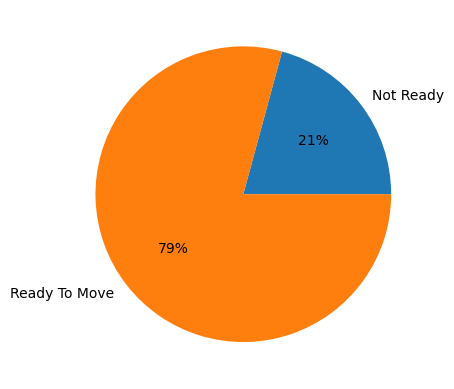

In [172]:
availability = pd.DataFrame(pun.availability.value_counts())
availability.columns = ['Counts']
availability = availability.sort_values('Counts', ascending=True)
plt.pie(x = availability.Counts, labels = availability.index, autopct = '%1.0f%%');

In [173]:
## Adding new column as price per_sq_feet

pun['price_per_sqft'] = pun['prices']*100000/pun['new_total_sqft']
pun

,site_location,availability,BHK,bath,balcony,area_type,new_total_sqft,prices,price_per_sqft
0,Navi Peth,Not Ready,2.0,2.0,0.0,Super built-up Area,1142.5,43.415,3800.000000
1,Padmavati,Ready To Move,5.0,5.0,2.0,Super built-up Area,4239.0,423.000,9978.768577
2,Parvati Darshan,Ready To Move,2.0,1.0,0.0,Built-up Area,884.0,58.000,6561.085973
3,Pashan,Not Ready,2.0,2.0,1.0,Super built-up Area,1045.0,98.890,9463.157895
4,Paud Road,Ready To Move,2.0,2.0,2.0,Super built-up Area,1019.0,49.860,4893.032385
...,...,...,...,...,...,...,...,...,...
13153,Pashan,Ready To Move,5.0,4.0,0.0,Built-up Area,3453.0,231.000,6689.834926
13154,Paud Road,Ready To Move,4.0,5.0,0.0,Super built-up Area,3600.0,400.000,11111.111111
13155,Pirangut,Ready To Move,2.0,2.0,1.0,Built-up Area,1141.0,60.000,5258.545136
13156,Prabhat Road,Not Ready,4.0,4.0,1.0,Super built-up Area,4689.0,488.000,10407.336319


In [174]:
pun.price_per_sqft.describe()

count    1.311400e+04
mean     7.845414e+03
std      1.070719e+05
min      2.678298e+02
25%      4.260592e+03
50%      5.416667e+03
75%      7.239955e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

### Outlier Removal Using Business Logic

**As a data scientist when you have a conversation with your business manager (who has expertise in real estate),
he will explain you that usually when square ft per bedroom is 300 then its a 1 BHK (or 2 BHK Flat is minimum 600 sqft 
if you have for example 400 sqft apartment with 2 BHK than that seems suspicious 
and can be removed as an outlier. 
We will remove such outliers by keeping our minimum thresold per BHK to be 300 sqft**

In [175]:
pun[pun.new_total_sqft/pun.BHK<300].head()

,site_location,availability,BHK,bath,balcony,area_type,new_total_sqft,prices,price_per_sqft
18,Sinhagad Road,Ready To Move,4.0,3.0,1.0,Plot Area,1080.0,155.0,14351.851852
28,Wakadewadi,Ready To Move,4.0,4.0,0.0,Plot Area,700.0,72.0,10285.714286
33,Ambegaon Budruk,Ready To Move,3.0,4.0,0.0,Plot Area,600.0,95.0,15833.333333
48,Dapodi,Ready To Move,6.0,4.0,2.0,Plot Area,1200.0,225.0,18750.000000
63,Hadapsar,Ready To Move,4.0,4.0,2.0,Plot Area,315.0,90.0,28571.428571


##### By see the above values for 4,3 & 6 BHK it seems that the total_sqft is not appropriate . So we can easily remove such outliers

In [176]:
pun = pun[~(pun.new_total_sqft/pun.BHK<300)]
pun.shape

(12486, 9)

### OUTLIER REMOVAL USING BATHROOMS FEATURE

Text(0, 0.5, 'Count')

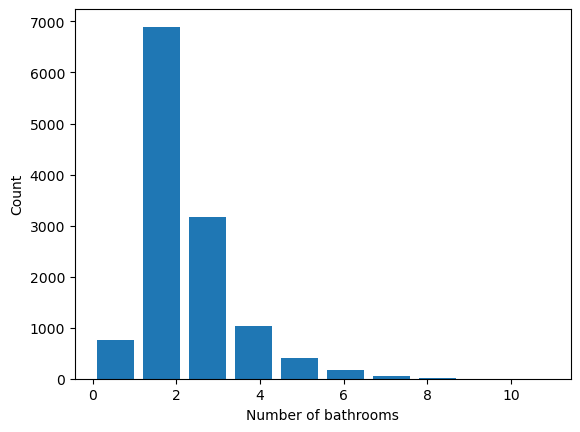

In [177]:
plt.hist(pun.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [178]:
pun[pun.bath>pun.BHK+2]

,site_location,availability,BHK,bath,balcony,area_type,new_total_sqft,prices,price_per_sqft
2583,Ghorpade Peth,Ready To Move,6.0,9.0,1.0,Super built-up Area,11338.0,1000.0,8819.897689
6744,Dhole Patil Road,Not Ready,5.0,8.0,3.0,Super built-up Area,7500.0,1700.0,22666.666667
7602,Ghorpadi,Ready To Move,4.0,7.0,2.0,Built-up Area,2460.0,80.0,3252.032520
9388,Baner,Ready To Move,0.5,8.0,3.0,Plot Area,1200.0,230.0,19166.666667
9645,Raviwar Peth,Ready To Move,0.5,9.0,0.0,Plot Area,3300.0,450.0,13636.363636
9849,Tilak Road,Ready To Move,3.0,6.0,2.0,Plot Area,2400.0,775.0,32291.666667
10989,Vadgaon Budruk,Ready To Move,0.5,11.0,0.0,Plot Area,1200.0,105.0,8750.000000
11185,Warje,Ready To Move,0.5,9.0,3.0,Plot Area,3280.0,450.0,13719.512195
11222,Karve Nagar,Ready To Move,4.0,8.0,0.0,Built-up Area,7000.0,450.0,6428.571429
11953,Baner,Ready To Move,3.0,6.0,2.0,Super built-up Area,1806.0,116.0,6423.034330


**AGAIN THE BUSINESS MANAGER HAS A CONVERSATION WITH YOU (I.E. A DATA SCIENTIST) THAT IF YOU HAVE A 4 BEDROOM HOME AND EVEN IF YOU HAVE A BATHROOM IN ALL 4 ROOMS PLUS ONE GUEST BATHROOM, YOU WILL HAVE A TOTAL BATH = TOTAL BED + 1 MAX. ANYTHING ABOVE THAT IS AN OUTLIER OR A DATA ERROR AND CAN BE REMOVED**

In [179]:
pun = pun[pun.bath<pun.BHK+2]
pun.shape

(12333, 9)

In [180]:
#pun = pun.drop('price_per_sqft', axis = 1)

### Spliting the data into 2 parts for better accuracy

In [181]:
pun1 = pun[pun.prices < 100 ]
pun2 = pun[pun.prices >= 100 ]

In [182]:
pun1.shape

(8692, 9)

In [183]:
# Checking the unique values in 'area_type' column
pun1.area_type.value_counts()

# Since the column has only few unique values, we don't perform any operation

Super built-up  Area    6590
Built-up  Area          1603
Plot  Area               439
Carpet  Area              60
Name: area_type, dtype: int64

In [184]:
# Replacing the objects into intergers

pun1.site_location = le.fit_transform(pun1.site_location)
pun1.availability = le.fit_transform(pun1.availability)
pun1.area_type = pun1.area_type.replace({'Super built-up  Area':0, 'Built-up  Area':1, 'Plot  Area':2,'Carpet  Area':3})

C:\Users\andu_13\AppData\Local\Temp\ipykernel_10544\2315590936.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pun1.site_location = le.fit_transform(pun1.site_location)
C:\Users\andu_13\AppData\Local\Temp\ipykernel_10544\2315590936.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pun1.availability = le.fit_transform(pun1.availability)
C:\Users\andu_13\AppData\Local\Temp\ipykernel_10544\2315590936.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [185]:
pun1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8692 entries, 0 to 13157
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   site_location   8692 non-null   int32  
 1   availability    8692 non-null   int32  
 2   BHK             8692 non-null   float64
 3   bath            8692 non-null   float64
 4   balcony         8692 non-null   float64
 5   area_type       8692 non-null   int64  
 6   new_total_sqft  8692 non-null   float64
 7   prices          8692 non-null   float64
 8   price_per_sqft  8692 non-null   float64
dtypes: float64(6), int32(2), int64(1)
memory usage: 611.2 KB


In [186]:
# pun = df1

## Random Sampling

In [187]:
from sklearn.model_selection import train_test_split

In [188]:
pun1.shape

(8692, 9)

In [189]:
# Train Test Split & Random Sampling

pun1_train , pun1_test = train_test_split(pun1 , test_size=0.25)

pun1_train_x = pun1_train.iloc[:: , 0:-1]
pun1_train_y = pun1_train.iloc[: , -1]

pun1_test_x = pun1_test.iloc[: , 0:-1]
pun1_test_y = pun1_test.iloc[: , -1]

In [190]:
pun1_train_x.shape

(6519, 8)

## Model Building

### Linear Regression Model

In [191]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(fit_intercept=True)

### Model For Tain Data

In [192]:
linreg.fit(pun1_train_x , pun1_train_y)

LinearRegression()

In [193]:
# Predicted values

pred_linreg = linreg.predict(pun1_train_x)
pred_linreg

array([5112.37553022, 2628.16988221, 3816.08397039, ..., 5638.70365755,
       7582.65768635, 5309.71669969])

In [194]:
Rsquare = r2_score(pun1_train_y , pred_linreg)
Rsquare

0.7994400781143245

In [195]:
# Calculation Adjusted Rsqaure 

N = pun1_train_x.shape[0] # Number of Records
K = pun1_train_x.shape[1] # No. on X variables only

Adjusted_Rsquare = 1 - ((1- Rsquare)*(N-1)/(N-K-1))
Adjusted_Rsquare

# here the Ad R2 is less than R2

0.7991936143086278

In [196]:
print('MSE = ' , mean_squared_error(pun1_train_y , pred_linreg))
print('mape = ', mean_absolute_percentage_error(pun1_train_y , pred_linreg) * 100)
print('Accuracy = ', 100 - mean_absolute_percentage_error(pun1_train_y , pred_linreg) * 100)

MSE =  358538.46841011144
mape =  7.178880689927439
Accuracy =  92.82111931007256


### Model For Test Data

In [197]:
pred_test = linreg.predict(pun1_test_x)

In [198]:
Rsquare_test = r2_score(pun1_test_y , pred_test)
Rsquare_test

0.8326300016762792

In [199]:
# Calculation Adjusted Rsqaure 

N = pun1_test_x.shape[0] # Number of Records
K = pun1_test_x.shape[1] # No. on X variables only

Adjusted_Rsquare = 1 - ((1- Rsquare_test)*(N-1)/(N-K-1))
Adjusted_Rsquare

# here the Ad R2 is less than R2

0.8320112586140843

In [200]:
print('Detailed Regression Parameters :')
print('RSqaure = ', Rsquare_test)
print('Adj RSqaure = ', Adjusted_Rsquare )
print('MSE = ' , mean_squared_error(pun1_test_y , pred_test))
print('RMSE = ', np.sqrt(mean_squared_error(pun1_test_y , pred_test)))
print('mape = ', mean_absolute_percentage_error(pun1_test_y , pred_test) * 100)
print('#Accuracy = ', 100 - mean_absolute_percentage_error(pun1_test_y , pred_test) * 100)

Detailed Regression Parameters :
RSqaure =  0.8326300016762792
Adj RSqaure =  0.8320112586140843
MSE =  327922.8302991357
RMSE =  572.6454664966236
mape =  6.433226762508311
#Accuracy =  93.56677323749169


## Cheking the Assumptions for Test Data

In [201]:
df_test = pd.DataFrame()
df_test['Actual_test'] = pun1_test_y
df_test['Predicted_test'] = pred_test
df_test['Error_test'] = df_test ['Actual_test'] - df_test ['Predicted_test']
df_test

,Actual_test,Predicted_test,Error_test
8230,7129.439621,7255.416374,-125.976753
396,4377.104377,4256.781953,120.322424
4925,4864.864865,5377.216912,-512.352047
3279,2500.000000,2737.246584,-237.246584
6798,4146.341463,4412.139163,-265.797700
...,...,...,...
11664,3750.000000,4083.901399,-333.901399
9370,4781.220657,4707.687361,73.533297
993,3200.000000,3098.414528,101.585472
8778,5380.073801,5763.622556,-383.548756


In [202]:
df_test.Error_test.mean()

# First step to check if mean of erros is 0 or not

12.583597538808542

In [63]:
df_test.Error_test.kurtosis() + 3

379.3682828399258

In [64]:
## Ploting the test data for better understanding

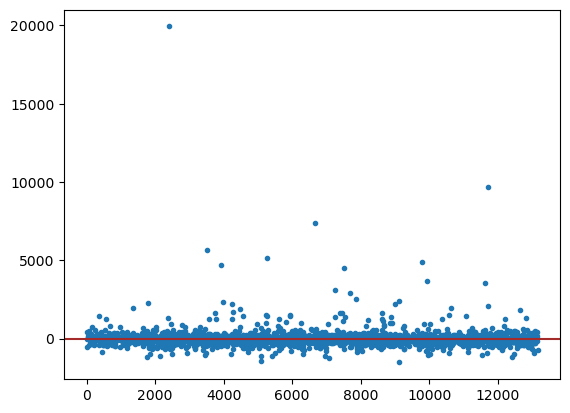

In [65]:
plt.plot(df_test.Error_test, '.')
plt.axhline(y=0, color = 'brown')

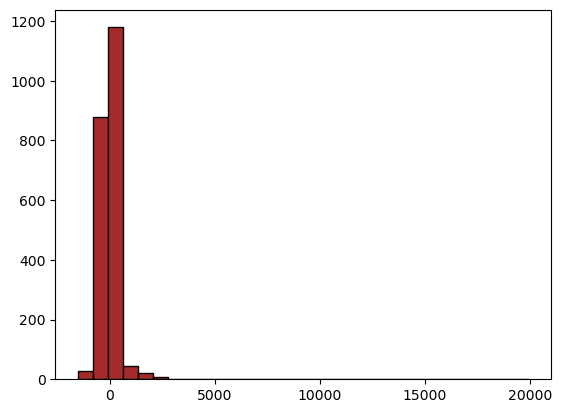

In [66]:
plt.hist(df_test.Error_test, bins = 30 , color = 'brown' , edgecolor = 'black');

<Axes: xlabel='Actual_test', ylabel='Predicted_test'>

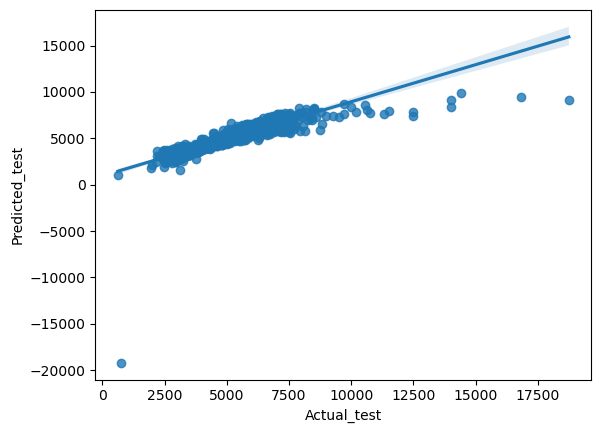

In [67]:
sns.regplot(x = df_test.Actual_test, y = df_test.Predicted_test, data = df_test)

In [68]:
# So from the above Graphs we get the Idea that there are some outliers present in the data 

In [69]:
pun1.shape

(8692, 9)

### Now removing the Outliers

In [70]:
def remove_outliers (df,col,k):
    mean= df[col].mean()
    global df1
    sd= df[col].std()
    final_list= [x for x in df[col] if (x > mean - k * sd)]
    final_list= [x for x in final_list if (x < mean + k * sd)]
    df1= df.loc[df[col].isin(final_list)]; 
    print(df1.shape)
    print('Number of outliers removed ==>', df.shape[0]- df1.shape[0])

In [71]:
remove_outliers(pun1,'prices', 2)

(8427, 9)
Number of outliers removed ==> 265


In [72]:
df1.shape

(8427, 9)

In [73]:
pun1 = df1

In [74]:
pun1.shape

(8427, 9)

In [75]:
# Train Test Split & Random Sampling

pun1_train , pun1_test = train_test_split(pun1 , test_size=0.25)

pun1_train_x = pun1_train.iloc[:: , 0:-1]
pun1_train_y = pun1_train.iloc[: , -1]

pun1_test_x = pun1_test.iloc[: , 0:-1]
pun1_test_y = pun1_test.iloc[: , -1]

## Model Building afer Outlier Removal

In [76]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(fit_intercept=True)

In [77]:
linreg.fit(pun1_train_x  , pun1_train_y )

LinearRegression()

In [78]:
pred_test1 = linreg.predict(pun1_test_x)

In [79]:
Rsquare1_test = r2_score(pun1_test_y , pred_test1)
Rsquare1_test

0.8326329097250352

In [80]:
# Calculation Adjusted Rsqaure 

N = pun1_test_x.shape[0] # Number of Records
K = pun1_test_x.shape[1] # No. on X variables only

Adjusted1_Rsquare = 1 - ((1- Rsquare1_test)*(N-1)/(N-K-1))
Adjusted1_Rsquare

# here the Ad R2 is less than R2

0.8319947130033004

In [81]:
print('Detailed Regression Parameters :')
print('RSqaure = ', Rsquare1_test)
print('Adj RSqaure = ', Adjusted1_Rsquare )
print('MSE = ' , mean_squared_error(pun1_test_y , pred_test1))
print('RMSE = ', np.sqrt(mean_squared_error(pun1_test_y , pred_test1)))
print('mape = ', mean_absolute_percentage_error(pun1_test_y , pred_test1) * 100)
print('#Accuracy = ', 100 - mean_absolute_percentage_error(pun1_test_y , pred_test1) * 100)

Detailed Regression Parameters :
RSqaure =  0.8326329097250352
Adj RSqaure =  0.8319947130033004
MSE =  283625.92760962405
RMSE =  532.5654209668743
mape =  6.030670136885702
#Accuracy =  93.9693298631143


In [82]:
df_test1 = pd.DataFrame()
df_test1['Actual_test1'] = pun1_test_y
df_test1['Predicted_test1'] = pred_test1
df_test1['Error_test1'] = df_test1 ['Actual_test1'] - df_test1 ['Predicted_test1']
df_test1

,Actual_test1,Predicted_test1,Error_test1
8890,3500.000000,3613.308377,-113.308377
6333,4555.555556,4554.599619,0.955936
12194,6722.689076,5486.931018,1235.758058
12376,6666.666667,6839.972904,-173.306237
768,4800.000000,5135.444350,-335.444350
...,...,...,...
8508,4174.193548,4033.794503,140.399046
1305,5650.162338,5868.516345,-218.354007
7167,4774.535809,5219.437006,-444.901197
12617,6482.982172,6480.352645,2.629527


In [83]:
df_test1.Error_test1.mean()

# First step to check if mean of erros is 0 or not

-17.520017009358682

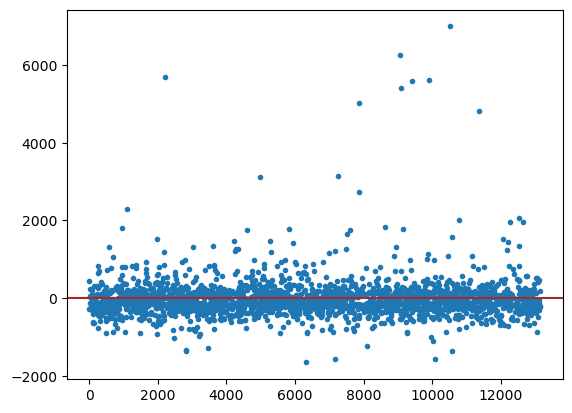

In [84]:
plt.plot(df_test1.Error_test1, '.')
plt.axhline(y=0, color = 'brown')

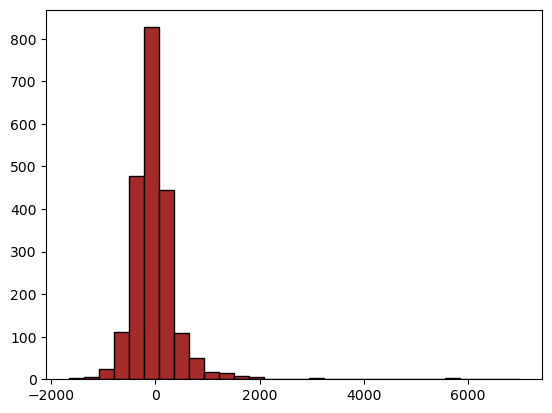

In [85]:
plt.hist(df_test1.Error_test1, bins = 30 , color = 'brown' , edgecolor = 'black');

<Axes: xlabel='Actual_test1', ylabel='Predicted_test1'>

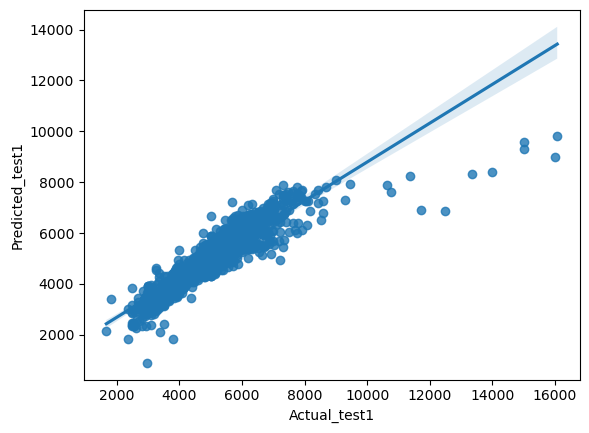

In [86]:
sns.regplot(x = df_test1.Actual_test1, y = df_test1.Predicted_test1, data = df_test1)

In [87]:
# After removing outliers and we have got almost 93 to 94 per of accuracy for the model